In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans

In [90]:
tweets = pd.read_csv('../data/twitter_api_pulls.csv')
twitter_handles = pd.read_csv('../data/twitter_handles.csv')

In [91]:
followers = pd.read_csv('../data/follower_count.csv')

In [92]:
dao = pd.read_json('../data/boardroom_dao.json', lines=True)
proposals = pd.read_json('../data/dao_proposals.json', lines=True)
tr_bal = pd.read_json('../data/dao_treasury_balance.json', lines=True)
tok_bal = pd.read_json('../data/dao_treasury_token_balance.json', lines=True)
tr_tran = pd.read_json('../data/dao_treasury_transactions.json', lines=True)
vote = pd.read_json('../data/vote.json', lines=True)

In [93]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'http[^ ]+','', str(i))
    temp.append(result)

tweets['tweets'] = temp

In [94]:
temp = []
for i in tweets['tweets']:
    result = re.sub(r'amp[^ ]+','', i)
    temp.append(result)

tweets['tweets'] = temp

In [95]:
tokenizer = RegexpTokenizer('\w+')

In [96]:
text_tokenized = [tokenizer.tokenize(i.lower())for i in tweets['tweets']]
tweets['tokenized_text'] = text_tokenized

In [97]:
tweets = tweets[~tweets['tweets'].str.startswith('RT')]

In [98]:
tweets = tweets.reset_index()

In [99]:
tweets.head()

,level_0,index,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text
0,0,0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv...",1htv s vegaypatino shares his perspective on f...
1,1,2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news...",1htv is live join us for daospace news a chat ...
2,2,3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,...",1htv monday stream tomorrow at 11am et daospac...
3,3,4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra...",2 hours left our gnosis auction is wrapping up...
4,4,5,1HiveOrg,The bees are stoked for next week! 🔥\n\nTY for...,16,5,2022-02-11 20:30:00+00:00,"[the, bees, are, stoked, for, next, week, ty, ...",the bees are stoked for next week ty for the a...


In [100]:
def join_vect(df, col):
    joined = []
    for i in df[f'{col}']:
        joined.append(" ". join(i))
    df[f'joined_{col}'] = joined
    return df

In [101]:
join_vect(tweets, 'tokenized_text')
cv = CountVectorizer(stop_words='english')

In [102]:
tweet_vect = cv.fit_transform(tweets['joined_tokenized_text'])
tweet_vect_tt = pd.DataFrame(tweet_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

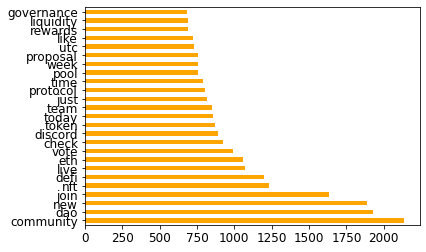

In [103]:
tweet_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [104]:
columns = ['dao', 'daos', 'vote', 'proposal', 'proposals', 'governance', 'voting', 'voter', 'votes', 'govern', 'governing']

In [105]:
tweet_vect_tt.head()

,00,000,000003613,000005,0001,000177,0002,0002ξ,0005,000ft,...,𝙏𝙬𝙞𝙣,𝙐𝙋𝘿𝘼𝙏𝙀𝙎,𝙗𝙮,𝙝𝙤𝙬,𝙞𝙨,𝙣𝙤,𝙨𝙪𝙗𝙨𝙩𝙞𝙩𝙪𝙩𝙚𝙨,𝙩𝙤,𝟬𝟬𝟬,𝟭𝟬
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
key_words_tweets = tweet_vect_tt[columns]
key_words_tweets.head()

,dao,daos,vote,proposal,proposals,governance,voting,voter,votes,govern,governing
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [107]:
key_words_tweets['sum'] = key_words_tweets.sum(axis=1)
key_words_tweets = key_words_tweets[key_words_tweets['sum']>=1]
key_words_tweets['tweet_index'] = key_words_tweets.index

<ipython-input-107-7d4e8f4936c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key_words_tweets['sum'] = key_words_tweets.sum(axis=1)


In [108]:
t_index = list(key_words_tweets['tweet_index'])

In [109]:
final_keywords_df = tweets.iloc[t_index]

In [110]:
final_keywords_df.head()

,level_0,index,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text
11,11,16,1HiveOrg,Have you visited @ShapeShift_io DAO's new dapp...,23,11,2022-02-03 18:30:00+00:00,"[have, you, visited, shapeshift_io, dao, s, ne...",have you visited shapeshift_io dao s new dapp ...
17,17,24,1HiveOrg,Do you want to see $FOX on the Agave Platform?...,11,3,2022-02-01 12:31:54+00:00,"[do, you, want, to, see, fox, on, the, agave, ...",do you want to see fox on the agave platform i...
19,19,26,1HiveOrg,We have been getting hundreds of DMs lately as...,9,1,2022-01-31 15:24:03+00:00,"[we, have, been, getting, hundreds, of, dms, l...",we have been getting hundreds of dms lately as...
31,31,46,1HiveOrg,It's is always great when good products come i...,13,6,2022-01-23 07:20:54+00:00,"[it, s, is, always, great, when, good, product...",it s is always great when good products come i...
35,35,54,1HiveOrg,Did you know @ensdomains DAO recently conclude...,17,4,2022-01-20 20:00:00+00:00,"[did, you, know, ensdomains, dao, recently, co...",did you know ensdomains dao recently concluded...


In [111]:
likes = final_keywords_df[['screen_name', 'likes']]
likes = likes.groupby(['screen_name']).mean()
likes = likes.reset_index()

In [112]:
likes

,screen_name,likes
0,1HiveOrg,19.916667
1,1inch,121.400000
2,@BitDAO_Official,71.363636
3,AIRA_Robonomics,45.571429
4,API3DAO,75.555556
...,...,...
167,vita_dao,8.200000
168,wgmi4thepeople,20.533333
169,xdaoapp,13.701031
170,yfBeta,38.375000


In [113]:
followers.head()

,screen_name,follower_count
0,1HiveOrg,6665
1,1inch,1015150
2,1UP,62175
3,AaveAave,428464
4,aavegotchi,92203


In [114]:
like_follower = pd.merge(likes, followers, on='screen_name')

In [115]:
df_total = tweets['screen_name'].value_counts().rename_axis('screen_name').reset_index(name='tweet_count')

In [116]:
final_keywords_df['screen_name'].value_counts()

financedotvote     146
compoundfinance    104
MakerDao           101
xdaoapp             97
nowdaoit            92
                  ... 
dao_tyan             1
PleasrDAO            1
nounsdao             1
PoolTogether_        1
CorgisCrypto         1
Name: screen_name, Length: 172, dtype: int64

In [117]:
df = final_keywords_df['screen_name'].value_counts().rename_axis('screen_name').reset_index(name='key_word_tweet_count')

In [118]:
name_dict = pd.Series(twitter_handles['name'].values, twitter_handles['twitter_handle']).to_dict()

In [119]:
df['screen_name'] = df['screen_name'].replace(name_dict)

In [120]:
df_total['screen_name'] = df_total['screen_name'].replace(name_dict)

In [121]:
like_follower['screen_name'] = like_follower['screen_name'].replace(name_dict)

In [122]:
df = pd.merge(df, df_total, on='screen_name')

In [123]:
df['key_word_ratio'] = df['key_word_tweet_count']/df['tweet_count']

In [124]:
df = df.sort_values(by='key_word_ratio', ascending=False)

In [125]:
like_follower.head()

,screen_name,likes,follower_count
0,1HiveLLC,19.916667,6665
1,1inch,121.400000,1015150
2,BitDAO,71.363636,34385
3,Airalab,45.571429,28222
4,API3,75.555556,37523


In [126]:
like_follower.shape

(171, 3)

In [127]:
df = pd.merge(df, like_follower, on='screen_name')

In [128]:
df['like_follower_ratio'] = df['likes']/df['follower_count']

In [129]:
df = df[df['key_word_tweet_count']>=10]

In [130]:
df = df.rename(columns={'screen_name': 'name'})

In [203]:
df  = df[['name', 'key_word_ratio', 'follower_count', 'like_follower_ratio']]

In [204]:
df.to_csv('../data/keyword_tweet_count.csv', index = False)

In [132]:
df['name'].value_counts().head()

BitDAO        1
Idle          1
pNetwork      1
TrojanDAO     1
RaribleDAO    1
Name: name, dtype: int64

In [133]:
df.head()

,name,key_word_tweet_count,tweet_count,key_word_ratio,likes,follower_count,like_follower_ratio
1,Finance.Vote,146,180,0.811111,8.554795,7025,0.001218
2,Compound,104,132,0.787879,70.711538,218838,0.000323
3,OceanDAO,25,33,0.757576,17.920000,1988,0.009014
5,XDAO,97,159,0.610063,13.701031,6174,0.002219
6,Collab19,15,25,0.600000,2.933333,52,0.056410


In [134]:
twitter_handles

,name,twitter_handle,twitter_url
0,1HiveLLC,1HiveOrg,https://twitter.com/1HiveOrg
1,1inch,1inch,https://twitter.com/1inch
2,1UP,1UP,https://twitter.com/1UP
3,Aave,AaveAave,https://twitter.com/AaveAave
4,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi
...,...,...,...
190,XDAO,xdaoapp,https://twitter.com/xdaoapp
191,Yam Finance,YamFinance,https://twitter.com/YamFinance
192,Yearn Finance,iearnfinance,https://twitter.com/iearnfinance
193,yfBeta,yfBeta,https://twitter.com/yfBeta


In [135]:
twitter_merge = pd.merge(twitter_handles, followers,  how='left', left_on='twitter_handle', right_on = 'screen_name')

In [136]:
twitter_merge.drop(columns = 'screen_name', inplace = True)

In [137]:
twitter_merge

,name,twitter_handle,twitter_url,follower_count
0,1HiveLLC,1HiveOrg,https://twitter.com/1HiveOrg,6665.0
1,1inch,1inch,https://twitter.com/1inch,1015150.0
2,1UP,1UP,https://twitter.com/1UP,62175.0
3,Aave,AaveAave,https://twitter.com/AaveAave,428464.0
4,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi,92203.0
...,...,...,...,...
190,XDAO,xdaoapp,https://twitter.com/xdaoapp,6174.0
191,Yam Finance,YamFinance,https://twitter.com/YamFinance,25296.0
192,Yearn Finance,iearnfinance,https://twitter.com/iearnfinance,182864.0
193,yfBeta,yfBeta,https://twitter.com/yfBeta,1630.0


In [138]:
twitter_dao = pd.merge(twitter_merge, dao,  how='left', left_on='name', right_on = 'name')

In [139]:
twitter_dao_final = twitter_dao.dropna().reset_index()

In [140]:
twitter_dao_final.drop(columns = 'index', inplace=True)

In [141]:
twitter_dao_final.to_csv('../data/twitter_dao_final.csv', index=False)

In [142]:
twitter_dao_final

,name,twitter_handle,twitter_url,follower_count,cname,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type
0,1inch,1inch,https://twitter.com/1inch,1015150.0,1inch,['Protocol'],3.0,214.0,175.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO
1,Aave,AaveAave,https://twitter.com/AaveAave,428464.0,aave,['Protocol'],58.0,1790.0,890.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO
2,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi,92203.0,aavegotchi,['Protocol'],246.0,77452.0,6512.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO
3,Ampleforth,AmpleforthOrg,https://twitter.com/AmpleforthOrg,36734.0,ampleforth,['Protocol'],0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'ampl', 'net...",DAO
4,Armor,ArmorFi,https://twitter.com/ArmorFi,7958.0,armorfi,['Investment'],2.0,23.0,20.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'armor', 'ne...",DAO
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vesper,VesperFi,https://twitter.com/VesperFi,20023.0,vsp,['Uncategorized'],17.0,1212.0,470.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'vsp', 'netw...",DAO
59,Visor,VisorFinance,https://twitter.com/VisorFinance,169.0,visor,['Uncategorized'],0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'visr', 'net...",DAO
60,WGMI,wgmi4thepeople,https://twitter.com/wgmi4thepeople,4378.0,wgmi,['Uncategorized'],1.0,1.0,1.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",DAO
61,yfBeta,yfBeta,https://twitter.com/yfBeta,1630.0,yfbeta,['Protocol'],14.0,708.0,324.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",DAO


In [143]:
twitter_dao_final = pd.get_dummies(twitter_dao_final, columns = ['categories'])

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [145]:
twitter_dao_final.dtypes

name                             object
twitter_handle                   object
twitter_url                      object
follower_count                  float64
cname                            object
totalProposals                  float64
totalVotes                      float64
uniqueVoters                    float64
icons                            object
tokens                           object
type                             object
categories_['Investment']         uint8
categories_['Media']              uint8
categories_['Product']            uint8
categories_['Protocol']           uint8
categories_['Service']            uint8
categories_['Social']             uint8
categories_['Uncategorized']      uint8
dtype: object

In [146]:
numerics = ['float64', 'uint8']

newdf = twitter_dao_final.select_dtypes(include=numerics)


In [147]:
newdf

,follower_count,totalProposals,totalVotes,uniqueVoters,categories_['Investment'],categories_['Media'],categories_['Product'],categories_['Protocol'],categories_['Service'],categories_['Social'],categories_['Uncategorized']
0,1015150.0,3.0,214.0,175.0,0,0,0,1,0,0,0
1,428464.0,58.0,1790.0,890.0,0,0,0,1,0,0,0
2,92203.0,246.0,77452.0,6512.0,0,0,0,1,0,0,0
3,36734.0,0.0,0.0,0.0,0,0,0,1,0,0,0
4,7958.0,2.0,23.0,20.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58,20023.0,17.0,1212.0,470.0,0,0,0,0,0,0,1
59,169.0,0.0,0.0,0.0,0,0,0,0,0,0,1
60,4378.0,1.0,1.0,1.0,0,0,0,0,0,0,1
61,1630.0,14.0,708.0,324.0,0,0,0,1,0,0,0


In [148]:
pca = PCA(n_components=2, random_state = 42)

sc = StandardScaler()

In [149]:
sc.fit(newdf)

StandardScaler()

In [150]:
features_sc = sc.transform(newdf)
pca.fit(features_sc)

features_pca = pca.transform(features_sc)

In [151]:
columns = [f'PCA_{i+1}' for i in pd.DataFrame(features_pca).columns]
features_df = pd.DataFrame(data = features_pca, columns=columns)

In [152]:
columns = [f'PCA_{i+1}' for i in pd.DataFrame(features_pca).columns]
features_df = pd.DataFrame(data = features_pca, columns=columns)

In [153]:
features_df = features_df.set_index(twitter_dao_final['name'])

In [154]:
features_df

,PCA_1,PCA_2
name,,
1inch,0.605159,3.016165
Aave,0.729944,1.582701
Aavegotchi,7.512074,-2.217368
Ampleforth,-0.417700,1.139292
Armor,-1.725209,-0.596107
...,...,...
Vesper,-1.537666,-1.207410
Visor,-1.896969,-1.091181
WGMI,-1.886468,-1.084832


In [155]:
pca.components_

array([[ 0.16157233,  0.43402067,  0.54103844,  0.51604912, -0.09161357,
         0.0570411 , -0.02539009,  0.27788613,  0.10060313,  0.03194718,
        -0.35473576],
       [ 0.33481565, -0.12074165, -0.2265867 , -0.29631442, -0.04296052,
        -0.16572697, -0.28350182,  0.64918588, -0.20570864, -0.21786718,
        -0.33655221]])

Text(0.5, 0, 'Principal Component')

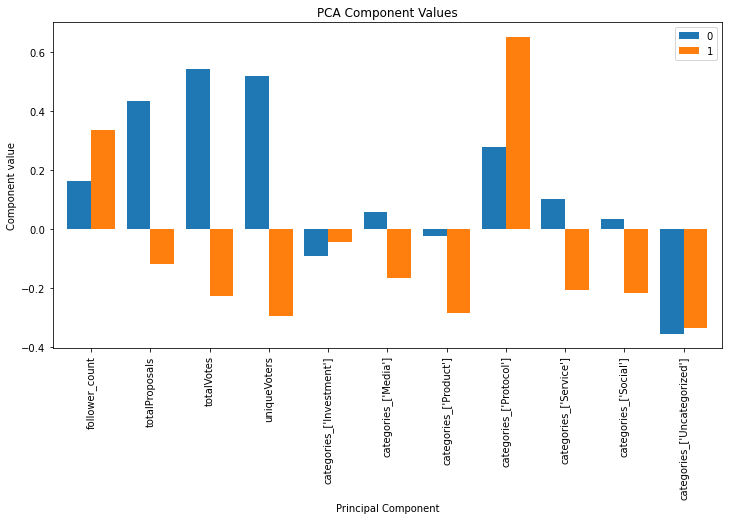

In [156]:
labels=list(newdf.columns)
df_tmp = pd.DataFrame(np.transpose(pca.components_))
df_tmp.index = labels
df_tmp.plot.bar(width=0.8, figsize=(12,6))
plt.title('PCA Component Values')
plt.ylabel('Component value')
plt.xlabel('Principal Component')

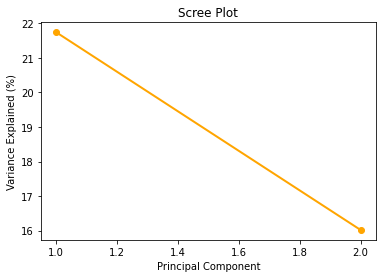

In [157]:
plt.plot(np.arange(pca.n_components_) + 1, 100*pca.explained_variance_ratio_,
             'o-', linewidth=2, color='orange')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.show()


In [158]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance of PCA Components: {np.round(var_exp[:2],3)}')

Explained variance of PCA Components: [0.217 0.16 ]


In [159]:
X1 = features_df.copy()

sc = StandardScaler()

X1_sc = sc.fit_transform(X1)

In [160]:
k = 3
km = KMeans(n_clusters=k, random_state=42)
km.fit(X1_sc)

KMeans(n_clusters=3, random_state=42)

In [161]:
km.cluster_centers_

array([[ 2.0095094 , -1.39237464],
       [-0.84964197, -0.9049628 ],
       [ 0.1078833 ,  0.82145261]])

In [162]:
km.labels_

array([2, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1],
      dtype=int32)

In [163]:
pred = km.predict(X1_sc)

In [164]:
features_df['cluster'] = km.labels_

In [165]:
features_df.head()

,PCA_1,PCA_2,cluster
name,,,
1inch,0.605159,3.016165,2
Aave,0.729944,1.582701,2
Aavegotchi,7.512074,-2.217368,0
Ampleforth,-0.417700,1.139292,2
Armor,-1.725209,-0.596107,1


In [166]:
features_df['name'] = features_df.index

In [167]:
features_df = features_df.reset_index(drop=True)

In [168]:
features_df

,PCA_1,PCA_2,cluster,name
0,0.605159,3.016165,2,1inch
1,0.729944,1.582701,2,Aave
2,7.512074,-2.217368,0,Aavegotchi
3,-0.417700,1.139292,2,Ampleforth
4,-1.725209,-0.596107,1,Armor
...,...,...,...,...
58,-1.537666,-1.207410,1,Vesper
59,-1.896969,-1.091181,1,Visor
60,-1.886468,-1.084832,1,WGMI
61,-0.208944,0.962092,2,yfBeta


In [169]:
from sklearn.metrics import silhouette_score

In [170]:
silhouette_score(X1_sc, km.labels_)

0.6974345086368762

In [171]:
centroids = pd.DataFrame(
sc.inverse_transform(km.cluster_centers_),
columns = ['PCA_1', 'PCA_2'])

centroids

,PCA_1,PCA_2
0,3.107657,-1.848356
1,-1.313951,-1.201324
2,0.166839,1.090466


<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

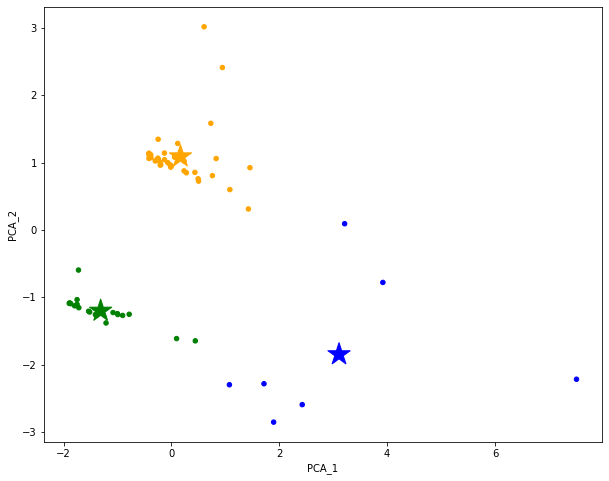

In [172]:
color_map = {0:"blue", 1:"green", 2:'orange'}
features_df['color'] = features_df['cluster'].map(color_map)

ax = features_df.plot(    
    kind="scatter", 
    x="PCA_1",
    y="PCA_2",
    figsize=(10,8),
    c = 'color'
)

centroids.plot(
    kind="scatter", 
    x="PCA_1",
    y="PCA_2", 
    marker="*",
    c=centroids.index.map(color_map),
    s=550,
    ax=ax
)

In [173]:
twitter_dao_final

,name,twitter_handle,twitter_url,follower_count,cname,totalProposals,totalVotes,uniqueVoters,icons,tokens,type,categories_['Investment'],categories_['Media'],categories_['Product'],categories_['Protocol'],categories_['Service'],categories_['Social'],categories_['Uncategorized']
0,1inch,1inch,https://twitter.com/1inch,1015150.0,1inch,3.0,214.0,175.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO,0,0,0,1,0,0,0
1,Aave,AaveAave,https://twitter.com/AaveAave,428464.0,aave,58.0,1790.0,890.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO,0,0,0,1,0,0,0
2,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi,92203.0,aavegotchi,246.0,77452.0,6512.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO,0,0,0,1,0,0,0
3,Ampleforth,AmpleforthOrg,https://twitter.com/AmpleforthOrg,36734.0,ampleforth,0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'ampl', 'net...",DAO,0,0,0,1,0,0,0
4,Armor,ArmorFi,https://twitter.com/ArmorFi,7958.0,armorfi,2.0,23.0,20.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'armor', 'ne...",DAO,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vesper,VesperFi,https://twitter.com/VesperFi,20023.0,vsp,17.0,1212.0,470.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'vsp', 'netw...",DAO,0,0,0,0,0,0,1
59,Visor,VisorFinance,https://twitter.com/VisorFinance,169.0,visor,0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'visr', 'net...",DAO,0,0,0,0,0,0,1
60,WGMI,wgmi4thepeople,https://twitter.com/wgmi4thepeople,4378.0,wgmi,1.0,1.0,1.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",DAO,0,0,0,0,0,0,1
61,yfBeta,yfBeta,https://twitter.com/yfBeta,1630.0,yfbeta,14.0,708.0,324.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",DAO,0,0,0,1,0,0,0


In [174]:
merged = pd.merge(twitter_dao_final, features_df, left_on = ['name'], right_on=['name'])


In [175]:
clusters = merged[['twitter_handle', 'cluster']]

In [176]:
clusters

,twitter_handle,cluster
0,1inch,2
1,AaveAave,2
2,aavegotchi,0
3,AmpleforthOrg,2
4,ArmorFi,1
...,...,...
58,VesperFi,1
59,VisorFinance,1
60,wgmi4thepeople,1
61,yfBeta,2


In [177]:
cluster_dict = dict(zip(clusters['twitter_handle'], clusters['cluster']))

In [178]:
tweets['cluster'] = tweets['screen_name']

In [179]:
tweets

,level_0,index,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text,cluster
0,0,0,1HiveOrg,1HTV's @vegaypatino shares his perspective on ...,4,1,2022-02-14 18:59:56+00:00,"[1htv, s, vegaypatino, shares, his, perspectiv...",1htv s vegaypatino shares his perspective on f...,1HiveOrg
1,1,2,1HiveOrg,1HTV is LIVE! 🐝 📺\n\nJoin us for DAOspace news...,11,4,2022-02-14 16:00:01+00:00,"[1htv, is, live, join, us, for, daospace, news...",1htv is live join us for daospace news a chat ...,1HiveOrg
2,2,3,1HiveOrg,1HTV Monday Stream tomorrow at 11am ET! 📺\n\n-...,18,8,2022-02-13 22:09:15+00:00,"[1htv, monday, stream, tomorrow, at, 11am, et,...",1htv monday stream tomorrow at 11am et daospac...,1HiveOrg
3,3,4,1HiveOrg,2 hours left!\n\nOur Gnosis Auction is wrappin...,10,3,2022-02-11 21:10:00+00:00,"[2, hours, left, our, gnosis, auction, is, wra...",2 hours left our gnosis auction is wrapping up...,1HiveOrg
4,4,5,1HiveOrg,The bees are stoked for next week! 🔥\n\nTY for...,16,5,2022-02-11 20:30:00+00:00,"[the, bees, are, stoked, for, next, week, ty, ...",the bees are stoked for next week ty for the a...,1HiveOrg
...,...,...,...,...,...,...,...,...,...,...
23540,23540,34623,MakerDao,"Three weeks ago from today, the Maker Protocol...",119,18,2022-02-11 16:25:00+00:00,"[three, weeks, ago, from, today, the, maker, p...",three weeks ago from today the maker protocol ...,MakerDao
23541,23541,34626,MakerDao,🥳 Our fren invites you to participate in a me...,35,5,2022-02-09 22:22:57+00:00,"[our, fren, invites, you, to, participate, in,...",our fren invites you to participate in a meme ...,MakerDao
23542,23542,34631,MakerDao,gm,344,34,2022-02-08 16:07:13+00:00,[gm],gm,MakerDao
23543,23543,34684,MakerDao,A series of Governance Polls have been added t...,85,18,2021-05-17 16:10:07+00:00,"[a, series, of, governance, polls, have, been,...",a series of governance polls have been added t...,MakerDao


In [180]:
cluster_dict

{'1inch': 2,
 'AaveAave': 2,
 'aavegotchi': 0,
 'AmpleforthOrg': 2,
 'ArmorFi': 1,
 'bprotocoleth': 2,
 'BalancerLabs': 0,
 'bancor': 0,
 'banklessDAO': 0,
 'blockzerolabs': 1,
 'bzxhq': 1,
 'compoundfinance': 2,
 'ConvexFinance': 2,
 'credmarkhq': 1,
 'defidollar': 2,
 'dHedgeOrg': 2,
 'drctoken': 1,
 'dydxprotocol': 2,
 'dsdproject': 2,
 'EarthFund_io': 1,
 'emptysetdollar': 2,
 'ensdomains': 2,
 'feiprotocol': 2,
 'forefront__': 1,
 'FWBtweets': 1,
 'FrontierDAO': 1,
 'gitcoin': 2,
 'gnosisPM': 2,
 'idlefinance': 2,
 'Index_DAO': 0,
 'ndxfi': 2,
 'Instadapp': 2,
 'InverseFinance': 2,
 'Keeper_DAO': 2,
 'Kleros_io': 2,
 'KlimaDAO': 0,
 'KrauseHouseDAO': 1,
 'MANTRADAO': 2,
 'mstable_': 2,
 'OokiTrade': 1,
 'The_OpenDAO': 0,
 'perpprotocol': 2,
 'PieDAO_DeFi': 2,
 'PoolTogether_': 2,
 'powerpoolcvp': 2,
 'PremiaFinance': 1,
 'PrimeDAO_': 1,
 'radicle': 1,
 'rally_io': 1,
 'RariCapital': 2,
 'seen_haus': 1,
 'ShapeShift_io': 2,
 'synthetix_io': 2,
 'graphprotocol': 2,
 'tokenlon': 1,
 

In [181]:
tweets = tweets.replace({"cluster": cluster_dict})

In [182]:
cluster2 = tweets[tweets['cluster'] == 2]

In [183]:
cv = CountVectorizer(stop_words='english')
clust_vect = cv.fit_transform(cluster2['joined_tokenized_text'])
clust_vect_tt = pd.DataFrame(clust_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

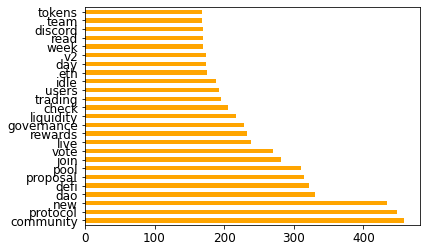

In [184]:
clust_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [185]:
cluster1 = tweets[tweets['cluster'] == 1]

In [186]:
cv = CountVectorizer(stop_words='english')
clust1_vect = cv.fit_transform(cluster1['joined_tokenized_text'])
clust1_vect_tt = pd.DataFrame(clust1_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

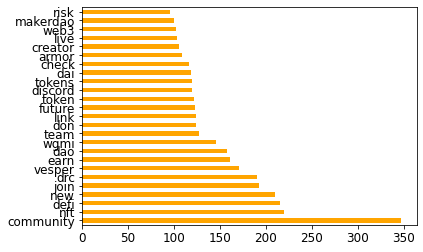

In [187]:
clust1_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [188]:
cluster0 = tweets[tweets['cluster'] == 0]

In [189]:
cv = CountVectorizer(stop_words='english')
clust0_vect = cv.fit_transform(cluster0['joined_tokenized_text'])
clust0_vect_tt = pd.DataFrame(clust0_vect.todense(), columns=cv.get_feature_names())

<AxesSubplot:>

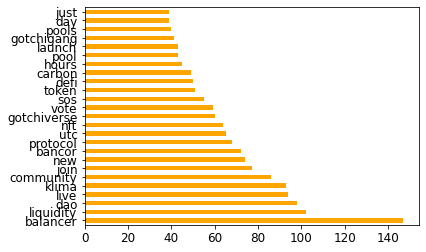

In [190]:
clust0_vect_tt.sum().sort_values(ascending=False).head(25).plot(kind='barh', fontsize=12, color = 'orange')

In [191]:
cluster0

,level_0,index,screen_name,tweets,likes,retweets,time,tokenized_text,joined_tokenized_text,cluster
559,559,800,aavegotchi,BE CAREFUL FRENS 🙏🙏🙏\n\ndon't let the licks wi...,45,15,2022-02-14 11:39:31+00:00,"[be, careful, frens, don, t, let, the, licks, ...",be careful frens don t let the licks win alway...,0
560,560,802,aavegotchi,good guy @coderdannn makin' it RAIN! 👻🌊🌈\n\nMa...,83,16,2022-02-13 14:58:33+00:00,"[good, guy, coderdannn, makin, it, rain, make,...",good guy coderdannn makin it rain make sure to...,0
561,561,803,aavegotchi,Coinbase fam get ready for the #Gotchiverse 👻\...,185,44,2022-02-11 23:34:23+00:00,"[coinbase, fam, get, ready, for, the, gotchive...",coinbase fam get ready for the gotchiverse now...,0
562,562,804,aavegotchi,LFG.mp4 📽️ Enter the #GOTCHIVERSE 🔥\n\nPLAY IT...,412,138,2022-02-10 14:34:38+00:00,"[lfg, mp4, enter, the, gotchiverse, play, it, ...",lfg mp4 enter the gotchiverse play it soon on ...,0
563,563,805,aavegotchi,ok i finally made one lol #Web2vsWeb3me #NFTs,155,19,2022-02-10 06:41:37+00:00,"[ok, i, finally, made, one, lol, web2vsweb3me,...",ok i finally made one lol web2vsweb3me nfts,0
...,...,...,...,...,...,...,...,...,...,...
15128,15128,22327,The_OpenDAO,100K holders on blockchain! Probably nothing!\...,1262,182,2021-12-25 09:01:27+00:00,"[100k, holders, on, blockchain, probably, noth...",100k holders on blockchain probably nothing we...,0
15129,15129,22329,The_OpenDAO,We just passed 100k holders 🆘🚨,2540,368,2021-12-25 08:51:00+00:00,"[we, just, passed, 100k, holders]",we just passed 100k holders,0
15130,15130,22342,The_OpenDAO,@zerothekidxo Servers down - try later,30,1,2021-12-25 03:57:02+00:00,"[zerothekidxo, servers, down, try, later]",zerothekidxo servers down try later,0
15131,15131,22344,The_OpenDAO,@xbtjk @9x9x9eth Check the website pls,2,0,2021-12-25 03:51:20+00:00,"[xbtjk, 9x9x9eth, check, the, website, pls]",xbtjk 9x9x9eth check the website pls,0


In [192]:
merged[merged['cluster'] == 2].describe()

,follower_count,totalProposals,totalVotes,uniqueVoters,categories_['Investment'],categories_['Media'],categories_['Product'],categories_['Protocol'],categories_['Service'],categories_['Social'],categories_['Uncategorized'],PCA_1,PCA_2,cluster
count,3.500000e+01,35.000000,35.000000,35.000000,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.000000,35.000000,35.0
mean,1.174554e+05,39.742857,1580.800000,497.657143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.166839,1.090466,2.0
std,2.210789e+05,51.436050,2018.389833,459.921665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.532104,0.463114,0.0
min,1.630000e+03,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.423873,0.310650,2.0
25%,1.937900e+04,8.500000,400.500000,172.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.247377,0.927755,2.0
50%,3.723000e+04,18.000000,916.000000,323.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.014578,1.024054,2.0
75%,1.131650e+05,57.500000,1751.500000,783.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.498183,1.098689,2.0
max,1.015150e+06,259.000000,9245.000000,2044.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.455117,3.016165,2.0


In [193]:
merged[merged['cluster'] == 1].describe()

,follower_count,totalProposals,totalVotes,uniqueVoters,categories_['Investment'],categories_['Media'],categories_['Product'],categories_['Protocol'],categories_['Service'],categories_['Social'],categories_['Uncategorized'],PCA_1,PCA_2,cluster
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.000000,21.0,21.0,21.000000,21.000000,21.000000,21.000000,21.0
mean,14217.571429,23.428571,758.380952,256.857143,0.047619,0.0,0.238095,0.0,0.0,0.095238,0.619048,-1.313951,-1.201324,1.0
std,14798.199761,42.157528,1108.228021,351.795294,0.218218,0.0,0.436436,0.0,0.0,0.300793,0.497613,0.637519,0.210101,0.0
min,169.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,-1.896969,-1.647577,1.0
25%,3870.000000,3.000000,31.000000,25.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,-1.751610,-1.256635,1.0
50%,7958.000000,10.000000,186.000000,80.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,-1.518214,-1.219438,1.0
75%,20023.000000,29.000000,1212.000000,405.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,-1.003778,-1.095864,1.0
max,50654.000000,198.000000,4162.000000,1319.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.441744,-0.596107,1.0


In [194]:
merged[merged['cluster'] == 0].describe()

,follower_count,totalProposals,totalVotes,uniqueVoters,categories_['Investment'],categories_['Media'],categories_['Product'],categories_['Protocol'],categories_['Service'],categories_['Social'],categories_['Uncategorized'],PCA_1,PCA_2,cluster
count,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.0
mean,90171.714286,142.000000,24121.571429,4064.285714,0.0,0.142857,0.142857,0.428571,0.142857,0.142857,0.0,3.107657,-1.848356,0.0
std,57083.469752,140.628352,24689.612585,2125.946355,0.0,0.377964,0.377964,0.534522,0.377964,0.377964,0.0,2.163409,1.080418,0.0
min,1160.000000,9.000000,8437.000000,947.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.074162,-2.854351,0.0
25%,55579.500000,19.000000,9002.000000,2590.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.805011,-2.447087,0.0
50%,92203.000000,82.000000,13937.000000,4133.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.424777,-2.284283,0.0
75%,133687.000000,274.500000,25510.500000,5839.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,3.566282,-1.498679,0.0
max,159306.000000,316.000000,77452.000000,6512.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,7.512074,0.091673,0.0


In [195]:
merged

,name,twitter_handle,twitter_url,follower_count,cname,totalProposals,totalVotes,uniqueVoters,icons,tokens,...,categories_['Media'],categories_['Product'],categories_['Protocol'],categories_['Service'],categories_['Social'],categories_['Uncategorized'],PCA_1,PCA_2,cluster,color
0,1inch,1inch,https://twitter.com/1inch,1015150.0,1inch,3.0,214.0,175.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",...,0,0,1,0,0,0,0.605159,3.016165,2,orange
1,Aave,AaveAave,https://twitter.com/AaveAave,428464.0,aave,58.0,1790.0,890.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",...,0,0,1,0,0,0,0.729944,1.582701,2,orange
2,Aavegotchi,aavegotchi,https://twitter.com/aavegotchi,92203.0,aavegotchi,246.0,77452.0,6512.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",...,0,0,1,0,0,0,7.512074,-2.217368,0,blue
3,Ampleforth,AmpleforthOrg,https://twitter.com/AmpleforthOrg,36734.0,ampleforth,0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'ampl', 'net...",...,0,0,1,0,0,0,-0.417700,1.139292,2,orange
4,Armor,ArmorFi,https://twitter.com/ArmorFi,7958.0,armorfi,2.0,23.0,20.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'armor', 'ne...",...,0,0,0,0,0,0,-1.725209,-0.596107,1,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Vesper,VesperFi,https://twitter.com/VesperFi,20023.0,vsp,17.0,1212.0,470.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'vsp', 'netw...",...,0,0,0,0,0,1,-1.537666,-1.207410,1,green
59,Visor,VisorFinance,https://twitter.com/VisorFinance,169.0,visor,0.0,0.0,0.0,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'visr', 'net...",...,0,0,0,0,0,1,-1.896969,-1.091181,1,green
60,WGMI,wgmi4thepeople,https://twitter.com/wgmi4thepeople,4378.0,wgmi,1.0,1.0,1.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",...,0,0,0,0,0,1,-1.886468,-1.084832,1,green
61,yfBeta,yfBeta,https://twitter.com/yfBeta,1630.0,yfbeta,14.0,708.0,324.0,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",...,0,0,1,0,0,0,-0.208944,0.962092,2,orange


In [196]:
import matplotlib.pyplot as plt

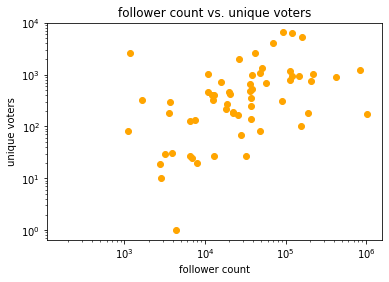

In [197]:
# scatterplot
plt.loglog(merged['follower_count'],
            merged['uniqueVoters'],
            color = 'orange',
            linewidth=0,
            marker="o")
plt.title('follower count vs. unique voters')
plt.xlabel('follower count')
plt.ylabel('unique voters');

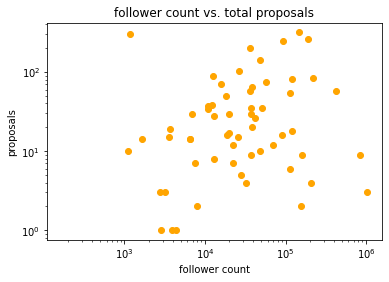

In [198]:
# scatterplot
plt.loglog(merged['follower_count'],
            merged['totalProposals'],
            color = 'orange',
            linewidth=0,
            marker = 'o')
plt.title('follower count vs. total proposals')
plt.xlabel('follower count')
plt.ylabel('proposals');

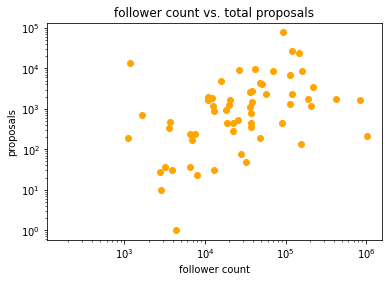

In [199]:
plt.loglog(merged['follower_count'],
            merged['totalVotes'],
            color = 'orange',
            linewidth=0,
            marker='o')
plt.title('follower count vs. total proposals')
plt.xlabel('follower count')
plt.ylabel('proposals');